# Jacob Pan, Jacobfp2, CHBE 494 HW 7

## Question 1

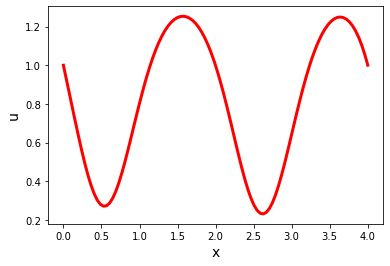

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

N = 100
lb = 1
rb = 1
x = np.linspace(0,4,N)
delta = x[1] - x[0]

def func(u):
    
    eqn = 0 * u
    
    # left boundary
    eqn[0] = u[0] - lb
    
    # interior
    for i in range(1, N-1):
        eqn[i] = 0.1 *(u[i + 1] - 2*u[i] + u[i-1])/delta/delta - np.sin(3*x[i]) + u[i] - u[i]**3
    
    # right boundary
    eqn[-1] = u[-1] - rb
    
    return eqn
    

sol = root(func,np.ones(N))

u = sol.x

# definte domain
x = np.linspace(0,4,N)

plt.plot(x,u,lw=3,color='r')
plt.xlabel('x',fontsize=14)
plt.ylabel('u',fontsize=14)
plt.show()

## Question 2

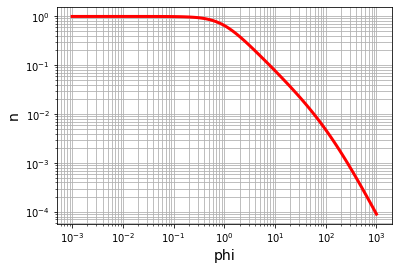

In [2]:
N = 100
lb = 1
rb = 0
x = np.linspace(0,1,N)
delta = x[1] - x[0]
phi = np.logspace(-3, 3, N)
n = []
currentPhi = 0

def func(c):
    
    eqn = 0 * c
    
    # left boundary
    eqn[0] = c[0] - lb
    
    # interior
    for i in range(1, N-1):
        eqn[i] = (c[i + 1] - 2*c[i] + c[i-1])/delta/delta - c[i]**2 * currentPhi**2
        
        
    # right boundary
    eqn[-1] = (c[-1] - c[-2]) / delta - rb
    
    return eqn
    
for curr in phi:
    currentPhi = curr
    sol = root(func,np.ones(N))

    c = sol.x
    deriv = (c[1]-c[0]) / delta
    n += [-deriv / (currentPhi ** 2)]





plt.plot(phi,n,lw=3,color='r')
plt.xlabel('phi',fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('n',fontsize=14)
plt.grid(True, which = "both")
plt.show()

## Question 3

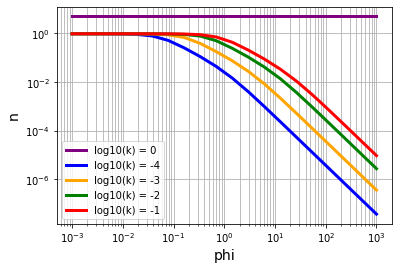

In [3]:
N = 20
lb = 1
lb2 = 0
rb = 0
rb2 = 0
x = np.linspace(0,1,N)
delta = x[1] - x[0]
phi = np.logspace(-3, 3, N)
n = 0 * phi
currentPhi = 0
k = np.logspace(-4, 0, 5)
currentK = 0


def func(c):
    c1 = c[:N]
    c2 = c[N:]
    eqn = 0 * c1
    eqn2 = 0 * c2
    
    # left boundary
    eqn[0] = c1[0] - lb
    eqn2[0] = c2[0] - lb2
    
    # interior
    for i in range(1, N-1):
        eqn[i] = (c1[i + 1] - 2*c1[i] + c1[i-1])/delta/delta - c1[i]**2 * currentPhi**2 + (1/currentK) * currentPhi**2*c2[i] 
        eqn2[i] = (c2[i + 1] - 2*c2[i] + c2[i-1])/delta/delta + (1/2) *c1[i]**2 * currentPhi**2 - (1/(2*currentK)) * currentPhi**2*c2[i] 
        
    # right boundary
    eqn[-1] = (c1[-1] - c1[-2]) / delta - rb
    eqn2[-1] = (c2[-1] - c2[-2]) / delta - rb2
    
    return np.concatenate((eqn, eqn2))

colors = ["purple", "blue", "orange", "green", "red"]
number = [0, -4, -3, -2, -1]
counter = 0
for currK in k:
    for curr in phi:
        currentK = currK
        currentPhi = curr
        sol = root(func,0.5* np.ones(2*N))
        c = sol.x
    
        deriv = (c[1]-c[0]) / delta
        n += [-deriv / (currentPhi ** 2)]

    plt.plot(phi,n,lw=3,color = colors[counter], label = f"log10(k) = {number[counter]}")
    counter += 1
    n = []

plt.xlabel('phi',fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel('n',fontsize=14)
plt.grid(True, which = "both")
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import randint

n = 100
p = 1000
A = [] 
y = 300
for i in range(n):
    A.append(np.zeros(3*n))
A = np.array(A)
A[-1,:] = 1


while p > 0:
    px = 0
    py = randint(3*n)
    while A[px,py] == 0:
        #up
        if py < y - 1 and A[px][py + 1] == 1:
            A[px][py] = 1
            p = p - 1
        #down
        elif py > 0 and A[px][py - 1] == 1:
            A[px][py] = 1
            p = p - 1
        #left
        elif px < y - 1 and A[px + 1][py] == 1:
            A[px][py] = 1
            p = p - 1
        #right
        elif px > 0 and A[px - 1][py] == 1:
            A[px][py] = 1
            p = p - 1
        else:
            move =  randint(4)
            #up
            if move == 0:
                if py < y - 1:
                    py += 1
                else: 
                    move = randint(4)
            #down
            elif move == 1:
                if py > 0:
                    py -= 1
                else:
                    move = randint(4)
            #left
            elif move == 2:
                if px < y - 1:
                    px += 1
                else:
                    move = randint(4)
            #right
            elif move == 3:
                if px > 0:
                    px -=1
                else:
                    move = randint(4)
print(sum(sum(A)))
plt.imshow(A)
plt.show()

KeyboardInterrupt: 